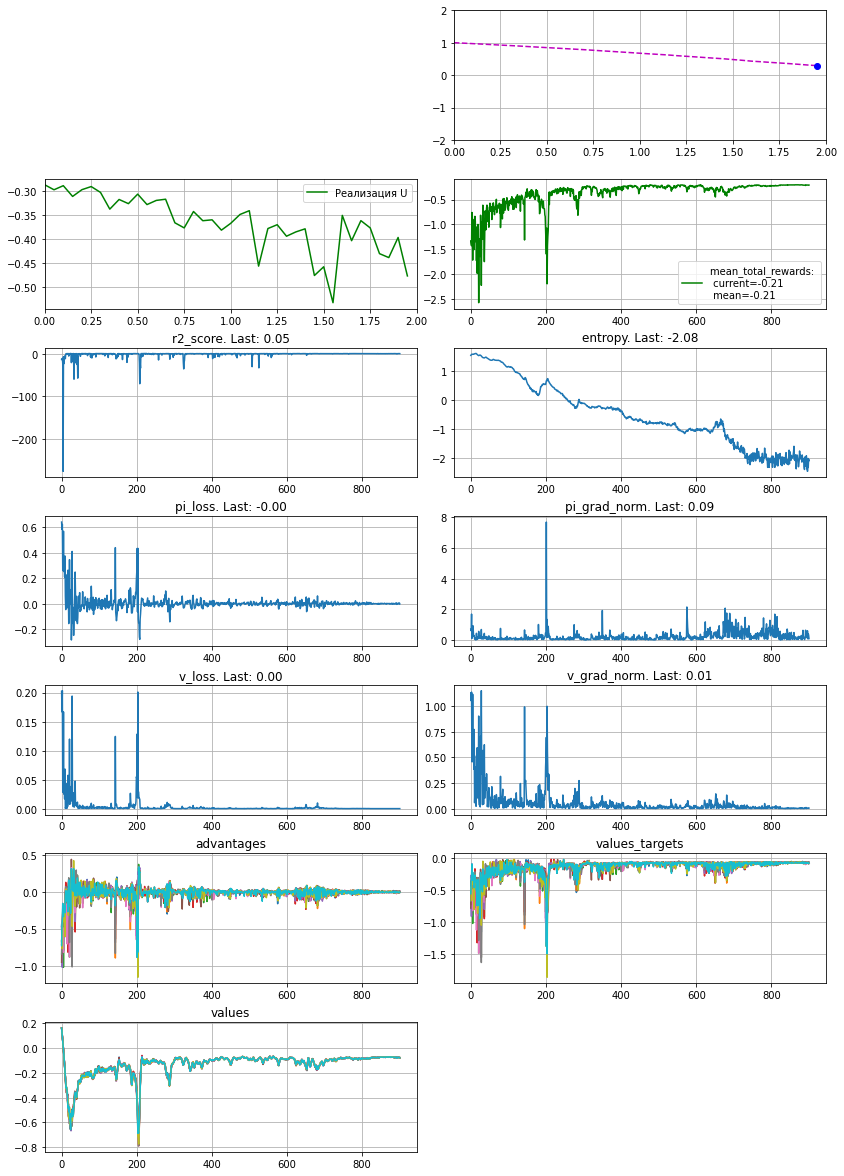

defaultdict(list, {})

In [6]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np
import torch
import torch.nn as nn
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.DiscreteActorCritic import DiscreteActorCritic
from Agents.PPO import PPO_Continious
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Agents.Utilities.ContinuousAgentMakers.ContinuousAgentMaker import  ContinuousAgentMaker
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
import Solvers.PolicySolver as solver
%load_ext autoreload
%autoreload 2


#environment initialization
env = SimpleControlProblem()
# action_n = 3
# action_values = np.linspace(env.action_min, env.action_max, num=action_n)

#agent initialization
def normal_scheme(logits):
    if len(logits.shape) == 1:
        means = logits[0]
        var = torch.exp(logits[1])
    else:
        means = logits[:, 0]
        var = torch.exp(logits[:, 1])
    return torch.distributions.Normal(means, var)

pi_model = SequentialNetwork([env.state_dim, 32, 1 + 1], nn.ReLU())
v_model = SequentialNetwork([env.state_dim, 32, 1], nn.ReLU())
PPO = PPO_Continious
agent = PPO(
    # ac,
    pi_model,
    v_model,
    continious_scheme=normal_scheme,
    # action_values=action_values,
    batch_size=10,
    epochs=5,
    clip_epsilon=.1,
    value_loss_coefficient=0.5,
    entropy_bonus_coefficient=0
)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=100)
solver.go(
    env,
    agent,
    episode_n=1000,
    show=visualizer.show,
    session_len=40,
    session_n=1,
)
